# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

##Load the Data

Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

import os

In [3]:
'''
LOADING DATASET
'''
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = "/content/drive/My Drive/colab projects/"
os.listdir(data_path)

['Online Retail.xlsx', 'Online Retail.csv']

In [6]:
df = pd.read_excel(data_path + "Online Retail.xlsx")
# To display the top 5 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.to_csv(data_path + "Online Retail.csv", index=False)

In [7]:
df = pd.read_csv(data_path + "Online Retail.csv")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


##Permform Data Cleaning
Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The dataset is composed of 541909 rows and 8 columns.

While examining the columns, it becomes evident that there are missing values in the CustomerID and the Description column. Therefore, it is imperative to take these factors into account when conducting an exploration of the dataset.

In [7]:
#exploring the unique values of each attribute
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products: ",df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


In [9]:
print(df.InvoiceNo)

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: object


The number of NA customers is quite large and that would impact the results.

InvoiceNo is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We have some negative values in our dataset. Maybe, this could mean that these quantities with corresponding UnitPrice value was returned or cancelled.

### Verify Assumption: Cancelled invoices

In [12]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [13]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


As we have not identified any positive values associated with orders having an InvoiceNo containing the prefix 'C', It is proven that the presence of negative values in the Quantity column signifies canceled quantities.

In [14]:
#no of rows of cancelled orders
print("no of rows of cancelled orders: ",len(cancelled_orders))
#percentage of cancelled orders in total orders
total_orders = df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of cancelled orders: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

no of rows of cancelled orders:  9288
Percentage of cancelled orders: 9288/25900 (35.86%) 


We observe a substantial proportion of canceled orders, accounting for 35% of the total. Analyzing these canceled orders could offer insights into mitigating future cancellations.

##EDA Analysis

Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

### Average number of orders per customer

In [15]:
groupby_customers = pd.DataFrame( df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [16]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


The average number of orders per customer is 5.

###The average number of unique items per order

In [17]:
groupby_invoice = pd.DataFrame( df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()

,productsNumber
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [18]:
groupby_invoice.describe()

,productsNumber
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


The average number of unique items per order is 20

In [19]:
df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique()

InvoiceNo  CustomerID
536365     17850.0        7
536366     17850.0        2
536367     13047.0       12
536368     13047.0        4
536369     13047.0        1
                         ..
C581484    16446.0        1
C581490    14397.0        2
C581499    15498.0        1
C581568    15311.0        1
C581569    17315.0        2
Name: StockCode, Length: 22190, dtype: int64

### customers per country

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
customers_per_country = pd.DataFrame( df.groupby('Country')['CustomerID'].nunique())
customers_per_country.head()

,CustomerID
Country,
Australia,9
Austria,11
Bahrain,2
Belgium,25
Brazil,1


In [31]:
customers_per_country['index'] = customers_per_country.index
customers_per_country.head()

,CustomerID,index
Country,,
Australia,9,Australia
Austria,11,Austria
Bahrain,2,Bahrain
Belgium,25,Belgium
Brazil,1,Brazil


In [32]:
customers_per_country.columns=['noCustomerID','Country']

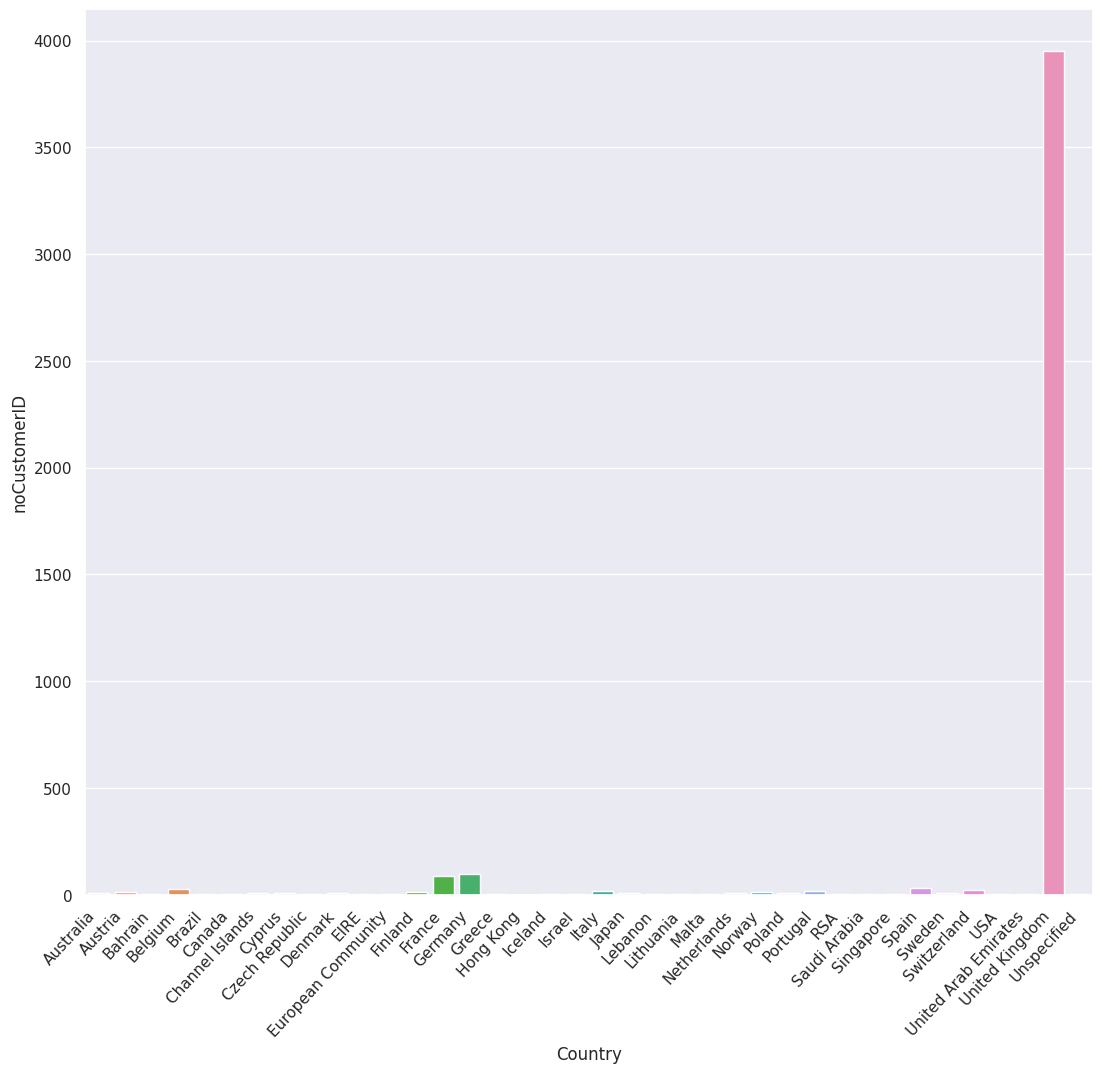

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='noCustomerID',data=customers_per_country,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

###Rotal revenue per country

In [20]:
df['total_cost'] = df['Quantity'] * df['UnitPrice']

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


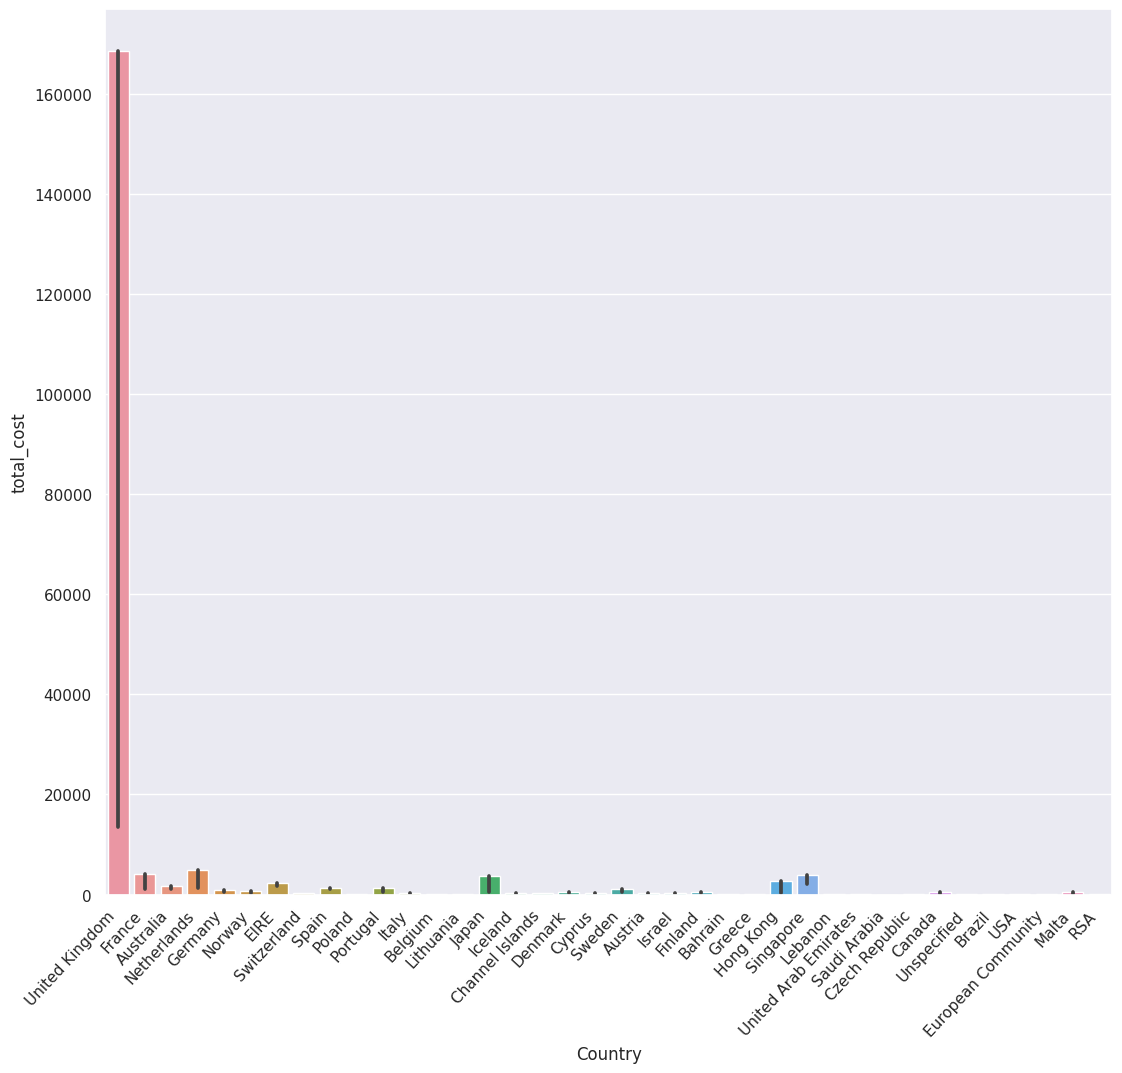

In [23]:

fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='total_cost',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [36]:
df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)

<ipython-input-36-109a0e1529f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)


,Quantity,UnitPrice,CustomerID,total_cost
Country,,,,
United Kingdom,4263829,2245715.474,5.626433e+09,8187806.364
Netherlands,200128,6492.550,3.419054e+07,284661.540
EIRE,142637,48447.190,1.103917e+08,263276.820
Germany,117448,37666.000,1.200751e+08,221698.210
France,110480,43031.990,1.076489e+08,197403.900
Australia,83653,4054.750,1.569300e+07,137077.270
Switzerland,30325,6813.690,2.377592e+07,56385.350
Spain,26824,12633.450,3.268929e+07,54774.580
Belgium,23152,7540.130,2.571829e+07,40910.960


Lasrgect market is in the UK
###Analysing the UK market

no of customers in the UK:

In [38]:
df[ df ['Country'] == 'United Kingdom']['CustomerID'].nunique()

3950

In [40]:
retail_uk = df[df['Country']=='United Kingdom']
retail_uk.describe()

,Quantity,UnitPrice,CustomerID,total_cost
count,495478.000000,495478.000000,361878.000000,495478.000000
mean,8.605486,4.532422,15547.871368,16.525065
std,227.588756,99.315438,1594.402590,394.839116
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,3.290000
50%,3.000000,2.100000,15514.000000,8.290000
75%,10.000000,4.130000,16931.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [41]:
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_uk),2),"%" )
print('Number of countries: ',retail_uk['Country'].nunique())

Number of transactions:  23494
Number of products bought:  4065
Number of customers: 3950
Percentage of customers NA:  26.96 %
Number of countries:  1


products that are bought most in the UK:

In [45]:
groupedProduct = retail_uk.groupby('Description',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
print(groupedProduct)

                             Description  Quantity
3988   WORLD WAR 2 GLIDERS ASSTD DESIGNS     48326
1858             JUMBO BAG RED RETROSPOT     43167
2725                      POPCORN HOLDER     34365
242        ASSORTED COLOUR BIRD ORNAMENT     33679
3898  WHITE HANGING HEART T-LIGHT HOLDER     33193
...                                  ...       ...
1118                             Damaged     -7540
2780        Printing smudges/thrown away     -9058
4095                               check    -12030
3721              Unsaleable, destroyed.    -15644
4146        printing smudges/thrown away    -19200

[4202 rows x 2 columns]


## Market Basket Analysis

For market basket analysis, we are doing some data clean up to make the analysis easier.

In [8]:
#remove additional spaces
df['Description'] = df['Description'].str.strip()
#remove NA values
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
#remove cancelled orders
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
retail_df = df[df['InvoiceNo'].str.contains('C')]

In [9]:
def mapping(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [10]:
def basket(country_filter):
    basket = (retail_df[retail_df['Country'] == country_filter]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
    return basket


In [22]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###UK market basket:

In [29]:
retail_filtered = df[df['Country']=="United Kingdom"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
basket = (retail_filtered[retail_filtered['Quantity']<10]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
basket_sets = basket.applymap(mapping)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
frequent_itemsets_uk = apriori(basket_sets, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.5)
rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.042150,0.042835,0.030348,0.720000,16.808856,0.028542,3.418448,0.981894
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.042835,0.042150,0.030348,0.708487,16.808856,0.028542,3.285791,0.982597


According to the results a customer is 16 times more likely to buy a GREEN REGENCY TEACUP AND SAUCER than an average customer (lift) if he/she buys ROSES REGENCY TEACUP AND SAUCER. This rule is "true" in 72% of the cases (confidence). This can be used as insight to recommend GREEN REGENCY TEACUP AND SAUCER for those who bought the ROSES one.

###France market basket:

In [33]:
retail_filtered = df[df['Country']=="France"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
basket = (retail_filtered[retail_filtered['Quantity']<10]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
basket_sets = basket.applymap(mapping)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
frequent_itemsets_uk = apriori(basket_sets, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.5)
rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.062084,0.064302,0.044346,0.714286,11.108374,0.040354,3.274945,0.970213
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.064302,0.062084,0.044346,0.689655,11.108374,0.040354,3.022173,0.972512
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.062084,0.062084,0.048780,0.785714,12.655612,0.044926,4.376940,0.981947
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.062084,0.062084,0.048780,0.785714,12.655612,0.044926,4.376940,0.981947
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.062084,0.064302,0.044346,0.714286,11.108374,0.040354,3.274945,0.970213


According to the results a customer is 11 or 12 times more likely to buy a ALARM CLOCK BAKELIKE PINK than an average customer (lift) if he/she buys ALARM CLOCK BAKELIKE GREEN. This rule is "true" in 71% of the cases (confidence). This can be used as insight to recommend ALARM CLOCK BAKELIKE PINK for those who bought the GREEN one.



###Netherlands market basket:

In [37]:
retail_filtered = df[df['Country']=="Netherlands"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
basket = (retail_filtered[retail_filtered['Quantity']<10]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
basket_sets = basket.applymap(mapping)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
frequent_itemsets_uk = apriori(basket_sets, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.5)
rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(MINT KITCHEN SCALES),(IVORY KITCHEN SCALES),0.044776,0.059701,0.044776,1.00,16.75,0.042103,inf,0.984375
1,(IVORY KITCHEN SCALES),(MINT KITCHEN SCALES),0.059701,0.044776,0.044776,0.75,16.75,0.042103,3.820896,1.000000
